# Support Vector Machine Implementation

<div style="text-align : justify"><font size=4><b>Grandmother’s Story </b>: When we have 2 variables, a line can separate between two categories. If we have 3 variables, the same job is performed by a plane separating between 2 or more variables. For a high n-dimensions, we have a hyperplane that is able to separate between variables. Now, in this high dimension, the distance between the hyperplane and the point closest to the hyperplane is known as the margin. The idea of a Support Vector Machine is to find the hyperplane with the highest margin value. Higher the margin, the better is the chances that new points in the test data will fit accurately on the classification.</font></div>

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

%matplotlib inline

## Cross Validation
<font size=4>Suppose we divide our dataset into training and test data. Let the ratio of test data to training data be 0.25 (1:4). In normal regression;/classification, we use 3 parts of the data to predict the model and one part to evaluate the model. In classification, we divide the data into 4 parts and perform training and test 4 times. Every time, a different part of the model is used as the test data. The best results out of the 4 is taken and is given as the final model. This is known as cross-validation.
Since the data was split into 4 parts, it is known as 4-fold cross validation. Generally, in practice, 10-fold cross validation is performed ie. Data is split into 10 parts and every part 9 out of 10 parts are used to make the model and the remaining part (which is different every time) is used to evaluate the model. So, we will have 10 models and the average accuracy of each test set will be taken as the overall accuracy</font>


## Support Vectors
<font size=4>Support Vectors are those points that are closer to the hyper plane and since they are closer, they affect the position angle etc of the hyperplane. These points help in building the SVM.</font>


## Misclassification and Soft Margin
Suppose some data points are misclassified and are put under the wrong label. This will affect the hyperplane. Hence, we introduce the soft margin. If we allow the misclassifications (ie. We ignore the data as misclassified and do not let it affect the hyperplane) then the margin we now get is a soft margin.
How to decide which soft margin is the best? We use cross validation for this ie, we will take different points as support vectors on both sides (both classes) of the hyperplane as soft margins and see which soft margin performs best on the test data. The data with minimum misclassification on the test set ie. The highest accuracy on the test set is considered to be the best.


## Support Vector Classifiers
Support Vector Classifier is the function that creates the hyperplane by maximizing the soft margin and minimizing the misclassification on the test set.
Imagine a dataset for giving a patient some medicine. If too less of a medicine is given, the patient will not be cured, if too much of the medicine is given, it can cause side effects and still the patient will not be cured. So the dataset is such that the lower values fall under class 0 (not cured), middle values fall under class 1 (cured) and the higher values fall under class 0 again (not cured)  
Making one partition on this is not feasible, if the partition is made on one side, the other side of the not cured patients still come under cured class which is incorrect. So, a support vector classifier would fail to create a suitable hyperplane. This is where Support Vector machines come into play.


## <b>SVM Kernels</b>


## Implementing SVM on a linearly seperable breast cancer dataset

### <b>Steps followed while implementing an SVM include:- </b> 
1) Loading the dataset  
2) Performing a test_train split  
3) Initializing the SVM classifier  
4) Fitting the training data on the classifier  
5) Using the classifier to get predicted values on the test dataset  
6) Using an accuracy metric to evaluate the model

In [27]:
#Load the dataset
dataset = datasets.load_breast_cancer()

In [28]:
#input features
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [32]:
#Classes/ Categories
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [43]:
#Input and output shape
dataset.data.shape,dataset.target.shape

((569, 30), (569,))

In [35]:
#train test split
X_train,X_test,Y_train,Y_test = train_test_split(dataset.data,dataset.target,test_size=0.25,random_state=31)

In [46]:
#Creating a SVM classifier, use linear, polynomial and radial kernels to compare results
clf_linear = svm.SVC(kernel='linear')
clf_poly = svm.SVC(kernel = 'poly')
clf_radial = svm.SVC(kernel = 'rbf') #default kernel

In [47]:
#fit the models
clf_linear.fit(X_train,Y_train)
clf_poly.fit(X_train,Y_train)
clf_radial.fit(X_train,Y_train)

SVC()

In [48]:
Y_pred_linear = clf_linear.predict(X_test)
Y_pred_poly = clf_poly.predict(X_test)
Y_pred_radial = clf_radial.predict(X_test)

In [49]:
print("Linear Accuracy", metrics.accuracy_score(Y_test,Y_pred_linear))
print("Polynomial Accuracy", metrics.accuracy_score(Y_test,Y_pred_poly))
print("Radial Accuracy", metrics.accuracy_score(Y_test,Y_pred_radial))

Linear Accuracy 0.9440559440559441
Polynomial Accuracy 0.8811188811188811
Radial Accuracy 0.8881118881118881


<b>Observation:</b> This dataset already had about 20 features and the linear kernel (which does not increase dimensions) worked well as compared to the other kernels in terms of accuracy score metric

## Implementing SVMs on a non linear classifiable data

In [14]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [15]:
#Generate Data
X,Y = make_circles(n_samples=5000,noise=0.05)

In [16]:
X,Y = unison_shuffled_copies(X,Y)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

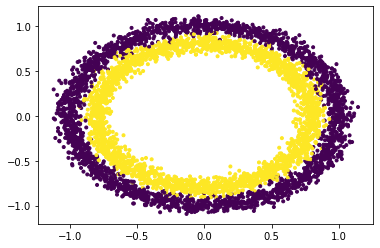

In [20]:
plt.scatter(X[:,0],X[:,1],c=Y,marker='.')
plt.show()

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25)

In [57]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((3750, 2), (1250, 2), (3750,), (1250,))

In [58]:
#Again, we will try all three kernels and see how they work with this data
clf_linear = svm.SVC(kernel='linear')
clf_poly = svm.SVC(kernel='poly')
clf_radial = svm.SVC() #deffault kernel is rbf

In [59]:
#fitting the data
clf_linear.fit(X_train,Y_train)
clf_poly.fit(X_train,Y_train)
clf_radial.fit(X_train,Y_train)

SVC()

In [61]:
#predicting the values
Y_pred_linear = clf_linear.predict(X_test)
Y_pred_poly = clf_poly.predict(X_test)
Y_pred_radial = clf_radial.predict(X_test)

In [62]:
#Evaluating the models
print("Linear Accuracy", metrics.accuracy_score(Y_test,Y_pred_linear))
print("Polynomial Accuracy", metrics.accuracy_score(Y_test,Y_pred_poly))
print("Radial Accuracy", metrics.accuracy_score(Y_test,Y_pred_radial))

Linear Accuracy 0.4824
Polynomial Accuracy 0.4824
Radial Accuracy 0.9768


<B>Observations:</B> As seen in this dataset, the Radial accuracy works best which is kind of intuitive since this circular data is radially spread and a radial classifier would work best in this case

## Implementing SVM on iris dataset with 3 classes

In [63]:
iris = datasets.load_iris()

In [70]:
iris.data.shape,iris.target.shape

((150, 4), (150,))

<B>Standardization or Normalization before applying SVM:</B> Applying standardization before using the SVM is important. Since the support vector classifer tries to maximize the margins, it is important that all the features are scaled so that the margin distance from every distance has similar meaning. 
Two important feature scaling methods are normalization and standardization. We will apply both of them and compare the results

In [82]:
#Standardization
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(iris.data)
X_std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [80]:
#Normalization
X_norm = normalize(iris.data)
X_norm

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [107]:
#performing the train-test split
X_train_s,X_test_s,Y_train_s,Y_test_s = train_test_split(X_std,iris.target,random_state=27)
X_train_n,X_test_n,Y_train_n,Y_test_n = train_test_split(X_norm,iris.target,random_state=27)

In [108]:
#Initializing the model for standardized data
clf_linear = svm.SVC(kernel='linear')
clf_poly = svm.SVC(kernel='poly')
clf_radial = svm.SVC() #deffault kernel is rbf

#fitting the model for standardised data
clf_linear.fit(X_train_s,Y_train_s)
clf_poly.fit(X_train_s,Y_train_s)
clf_radial.fit(X_train_s,Y_train_s)

#evaluating the model for standardized data
print("Accuracy when using Standardization")
print("Linear Accuracy", metrics.accuracy_score(Y_test_s,clf_linear.predict(X_test_s)))
print("Polynomial Accuracy", metrics.accuracy_score(Y_test_s,clf_poly.predict(X_test_s)))
print("Radial Accuracy", metrics.accuracy_score(Y_test_s,clf_radial.predict(X_test_s)))

Accuracy when using Standardization
Linear Accuracy 0.9736842105263158
Polynomial Accuracy 0.9210526315789473
Radial Accuracy 0.9210526315789473


In [109]:
#Initializing the model for normalized data
clf_linear = svm.SVC(kernel='linear')
clf_poly = svm.SVC(kernel='poly')
clf_radial = svm.SVC() #deffault kernel is rbf

#fitting the model for normalized data
clf_linear.fit(X_train_n,Y_train_n)
clf_poly.fit(X_train_n,Y_train_n)
clf_radial.fit(X_train_n,Y_train_n)

#evaluating the model for normalized data
print("Accuracy when using Normalized")
print("Linear Accuracy", metrics.accuracy_score(Y_test_n,clf_linear.predict(X_test_n)))
print("Polynomial Accuracy", metrics.accuracy_score(Y_test_n,clf_poly.predict(X_test_n)))
print("Radial Accuracy", metrics.accuracy_score(Y_test_n,clf_radial.predict(X_test_n)))

Accuracy when using Normalized
Linear Accuracy 0.6052631578947368
Polynomial Accuracy 0.9473684210526315
Radial Accuracy 1.0


<b>Observation:</b> Normalization and Standardization both help in improving the accuracy of an SVM classifier